In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
X, y = load_breast_cancer(return_X_y=True)

In [5]:
X.shape

(569, 30)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(X_train)

StandardScaler()

In [10]:
X_train = scaler.transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

In [12]:
params = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10]
    }, 
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10],
        'gamma': [0.01, 0.1, 1, 10]
    }
]

In [13]:
gs = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=5, verbose=5)

In [14]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.930 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=5)

In [15]:
gs.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [16]:
y_pred = gs.best_estimator_.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_train, y_pred)

0.9859154929577465

In [19]:
num_instances = 1000 
X = np.random.uniform(low=-1, high=1, size=(num_instances,2))

In [20]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [21]:
y = f(X[:,0], X[:,1])

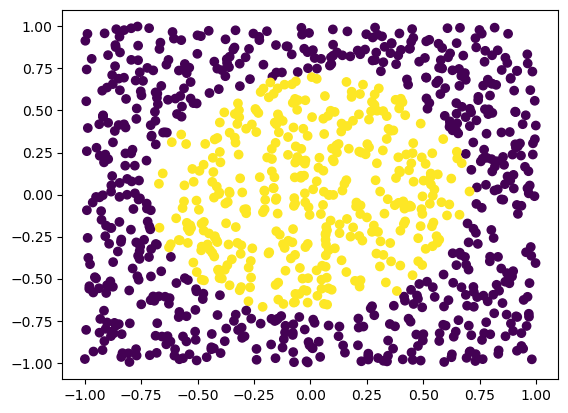

In [22]:
plt.scatter(X[:,0], X[:,1], c=y)

In [23]:
model = SVC(kernel='linear')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=123)

In [25]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_train_pred = model.predict(X_train)

In [27]:
accuracy_score(y_train, y_train_pred)

0.6266666666666667

In [28]:
y_test_pred = model.predict(X_test)

In [29]:
accuracy_score(y_test, y_test_pred)

0.628

In [30]:
model = SVC(kernel='rbf')

In [31]:
model.fit(X_train, y_train)

SVC()

In [32]:
y_train_pred = model.predict(X_train)

In [33]:
accuracy_score(y_train, y_train_pred)

0.984

In [34]:
y_test_pred = model.predict(X_test)

In [35]:
accuracy_score(y_test, y_test_pred)

0.976

In [36]:
print(f'Broj potpornih vektora: {model.n_support_}')

Broj potpornih vektora: [73 72]


In [37]:
print(f'Indeksi instanci koji su potporni vekotri: {model.support_}')

Indeksi instanci koji su potporni vekotri: [  9  20  31  34  44  59  82  86 103 136 139 143 144 149 163 177 205 208
 221 243 263 270 282 301 303 334 347 359 363 371 375 379 380 382 383 385
 390 392 395 398 401 404 410 419 426 433 441 445 452 455 462 465 470 476
 483 490 508 536 555 575 577 583 600 629 646 647 649 653 658 690 691 718
 728   1   8  22  42  60  62  78  84  88  94 104 122 145 150 167 188 194
 210 227 253 277 291 299 311 313 316 326 333 335 338 352 355 366 399 423
 428 429 443 451 469 473 480 481 486 487 493 494 507 509 513 518 531 566
 574 604 608 618 631 645 651 662 670 680 681 701 708 712 722 732 733 737
 746]


In [38]:
print('Potporni vektori: ')
print(model.support_vectors_)

Potporni vektori: 
[[ 0.01239182 -0.74350066]
 [-0.40078521 -0.59843101]
 [-0.56894139  0.52332709]
 [ 0.48242959 -0.53170908]
 [ 0.10036062  0.82585446]
 [ 0.5953476   0.4680894 ]
 [-0.68502583 -0.29389047]
 [-0.72099774 -0.1604239 ]
 [-0.33073097 -0.71406505]
 [ 0.52685114  0.54446193]
 [ 0.64687462 -0.41962415]
 [ 0.08631582  0.76668112]
 [ 0.44581163 -0.56634478]
 [ 0.73524508 -0.05559107]
 [ 0.01892046  0.8118306 ]
 [ 0.73322723 -0.22735512]
 [-0.70553194 -0.32414318]
 [-0.11057109 -0.77996414]
 [-0.26768355  0.68636239]
 [-0.7093989  -0.20669009]
 [-0.54275178 -0.50809481]
 [ 0.4764825  -0.61938233]
 [-0.15074462  0.72559324]
 [-0.64492317  0.37024499]
 [ 0.43282616  0.65319907]
 [ 0.02903105  0.74911062]
 [-0.01071842  0.75141145]
 [ 0.267117   -0.67617214]
 [-0.37675155  0.7037304 ]
 [-0.72523517 -0.05347604]
 [-0.31243609  0.64474525]
 [ 0.51422331  0.57163097]
 [-0.28421774 -0.68976613]
 [ 0.71308901  0.14705251]
 [ 0.61776372  0.43521375]
 [-0.26219823 -0.73779435]
 [ 0.6615